In [4]:
from utils import *
from experiment import *

import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
plt.style.use("light")

PATH = "/home/max/Temp/Praktikum/transversal/"
SAVE_PATH = "/home/max/Nextcloud/Praktikum/Report/figures/transversal"
REPEAT = 3

# Single Experiment Run

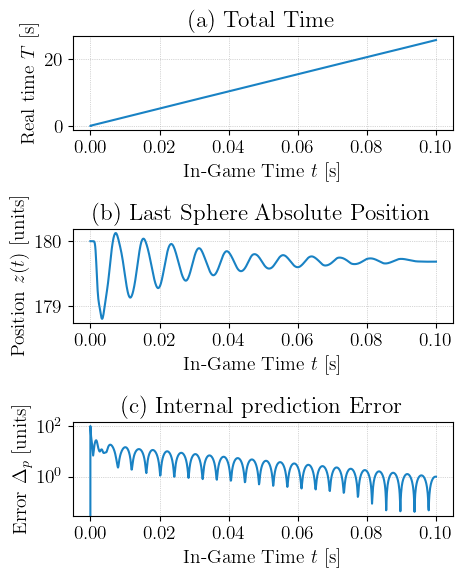

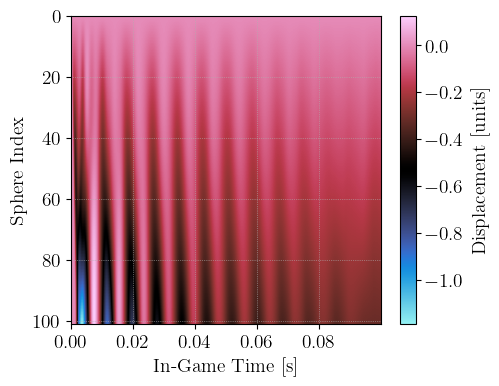

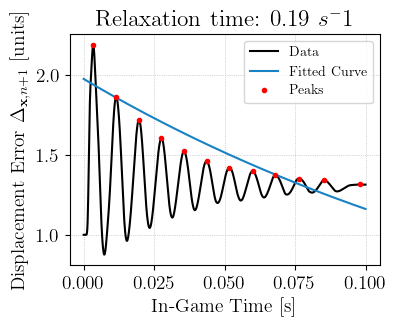

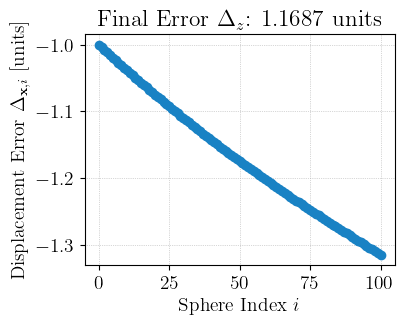

In [13]:
positions = read_json_file(PATH + "reference/reference/positions.json")

reference = GuidewireExperiment(positions)

reference.plot_experiment(axis=2)
plt.savefig(SAVE_PATH + "experiment1.pdf", bbox_inches="tight", dpi=300)
plt.show()

reference.plot_all_spheres(axis=2)
plt.savefig(SAVE_PATH + "experiment1_2.pdf", bbox_inches="tight", dpi=300)
plt.show()

_ = get_decay_rate(reference, [1,1], debug=True, offset=1, save=True)

In [104]:
COLORS = ["#9e0142", "#d53e4f", "#f46d43", "#fdae61", "#fee08b", "#ffffbf", "#e6f598", "#abdda4", "#66c2a5", "#3288bd", "#5e4fa2"]

def plot_transversal(name, params, reference, save=False):
    total_error = []

    plt.figure(figsize=(4,3))

    for i,param in enumerate(params):
        positions = read_json_file(PATH + f"{name}_0/{name}_0_{param}/positions.json")

        experiment = GuidewireExperiment(positions)

        # Get distance to reference
        print((reference.n_spheres-1)//(experiment.n_spheres-1))
        pos_ref = reference.get_all_spheres()[::(reference.n_spheres-1)//(experiment.n_spheres-1)]
        pos = experiment.get_all_spheres()
        dist = np.linalg.norm(pos_ref - pos, axis=2)
        
        # Save average distance
        total_error.append(np.mean(dist))

        plt.plot(dist[:,-1], "o-", label=f"steps: {param:.2e}", color=COLORS[i])
        plt.title("Distance to Reference")
        plt.ylabel("Distance [units]")
        plt.xlabel("Sphere Index $i$")
        
    plt.legend(prop={"size": 8})
    plt.show()
    
    plt.figure(figsize=(4,3))
    plt.imshow(dist, aspect="auto", cmap=cmr.lavender, extent=[0, experiment.get_total_time()[-1], experiment.n_spheres, 0], interpolation="bicubic")
    #plt.title("Time-Evolution of Distance to Reference")
    plt.xlabel("In-Game Time [s]")
    plt.ylabel("Sphere Index $i$")
    plt.colorbar(label="Distance [units]")
    plt.show()
    
    plt.figure(figsize=(4,3))
    plt.plot(params, total_error, "o-")
    plt.title("Average Distance to Reference")
    plt.ylabel("Distance [units]")
    plt.xlabel("Constraint Solver Steps")
    plt.show()

10
10
10
10
10
10
10
10
10
10


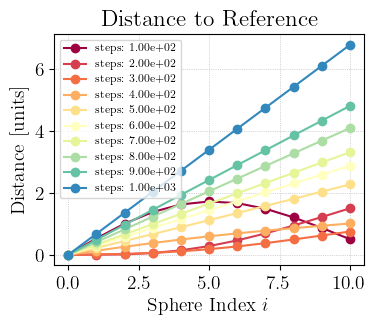

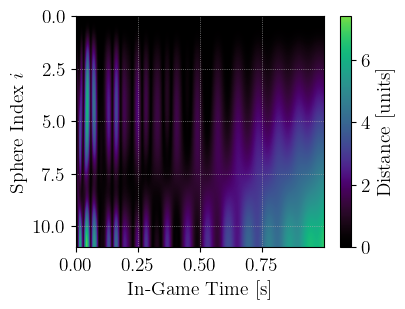

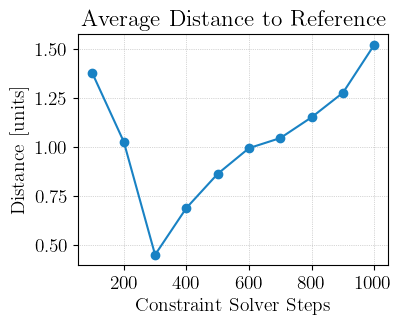

In [105]:
constraint_solver_steps = np.arange(100,1100,100)

plot_transversal("constraint_solver_steps", constraint_solver_steps, reference)

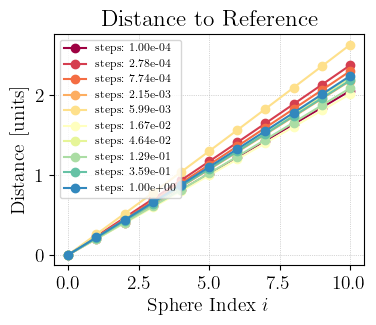

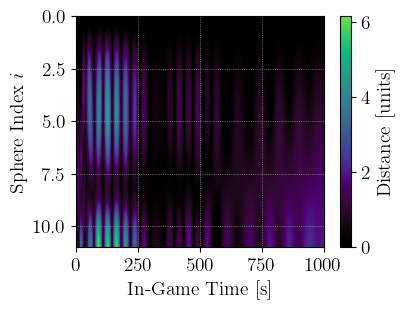

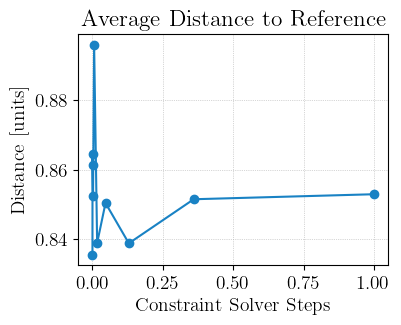

In [102]:
timesteps = np.logspace(-4, 0, 10)

plot_transversal("time_steps", timesteps, reference)

# Constraint Solver Steps

# Time steps

# Number of Rod Elements

10
5
3


ValueError: operands could not be broadcast together with shapes (34,1002,3) (31,1002,3) 

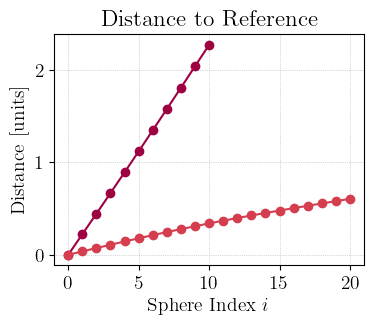

In [106]:
elements = np.arange(10,110,10).astype("float")

plot_transversal("rod_elements", elements, reference)

# Displacement

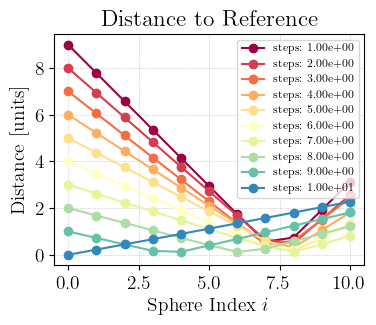

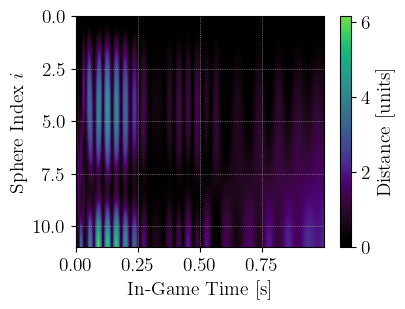

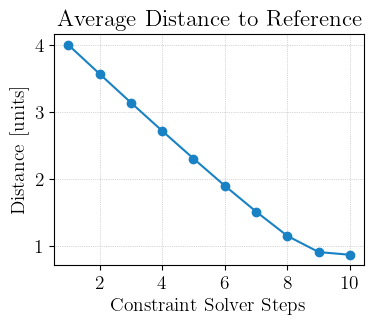

In [93]:

displacements = np.linspace(1,10, 10)

plot_transversal("displacemen", displacements, reference)